<a href="https://colab.research.google.com/github/shellymduncan/Project-2/blob/main/Project_2_Part_1_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shelly-Ann Duncan
# 9/30/22
# Project 2 - Part 1 (Core)

# Assignment:

* Your second project is going to have a lot more freedom than your first project. This is because we want you to have a project in your portfolio that interests you or relates to the industry you would like to work in.

* Your task for this week is to propose two possible datasets you would like to work with for Project 2.

# Import drive

In [1]:
# import drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# Import necessary libraries

In [29]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# First Choice dataset Heart Failure Prediction.

1. The source for this data can be found https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

2. "This dataset is used to predict a possible heart disease in persons.

3. The target in this dataset is the 'Heart Disease'.

4. This is a Classification problem.

5. How many features? There are 11 features in this dataset.

6. This data set has 918 rows of data.

7. What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset? At first glance, I do not forsee any issues with cleaning, modeling or exploring the dataset.

# Attribute Information for this dataset.
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

# Load data

In [3]:
# load the dataset
filename = '/content/drive/MyDrive/Week 8 /heart.csv'
df = pd.read_csv(filename)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Explore and clean the data



In [4]:
# make a copy of the dataset to avoid manipulations
ml_df = df.copy()

In [5]:
# check the datatypes
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# check for missing data
ml_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# check for duplicates
ml_df.duplicated().sum()

0

In [8]:
# check the shape
ml_df.shape

(918, 12)

# 10/6/22
# Part 2

In [9]:
# identify and address any inconsistencies in the dataset
# check for inconsistencies in the object columns
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [10]:
for col in str_cols:
  print(f'- Column= {col}')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Column= Sex
M    725
F    193
Name: Sex, dtype: int64



- Column= ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64



- Column= RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64



- Column= ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64



- Column= ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64





In [11]:
# check for inconsistencies in the interger columns
dtypes = df.dtypes
str_cols = dtypes[dtypes=='int'].index
str_cols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'HeartDisease'],
      dtype='object')

In [12]:
for col in str_cols:
  print(f'- Column= {col}')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Column= Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64



- Column= RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64



- Column= Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64



- Column= FastingBS
0    704
1    214
Name: FastingBS, dtype: int64



- Column= MaxHR
150    43
140    41
120    36
130    33
160  

In [13]:
# check for inconsistencies in the float column
dtypes = df.dtypes
str_cols = dtypes[dtypes=='float'].index
str_cols

Index(['Oldpeak'], dtype='object')

In [14]:
for col in str_cols:
  print(f'- Column= {col}')
  print(df[col].value_counts(dropna=False))

- Column= Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64


# Create univariate visuals for the target and all features.

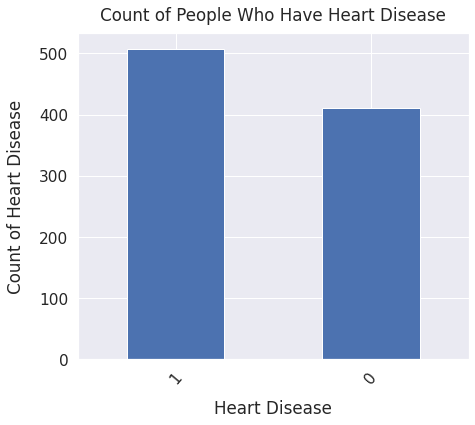

In [90]:
# create a barplot for target column Heart Disease
sns.set(font_scale = 1.4)
ml_df['HeartDisease'].value_counts().plot(kind = 'bar', figsize = (7, 6), rot = 50)
plt.xlabel("Heart Disease", labelpad = 14)
plt.ylabel("Count of Heart Disease", labelpad = 14)
plt.title("Count of People Who Have Heart Disease", y = 1.02);

* There are more persons with heart disease.

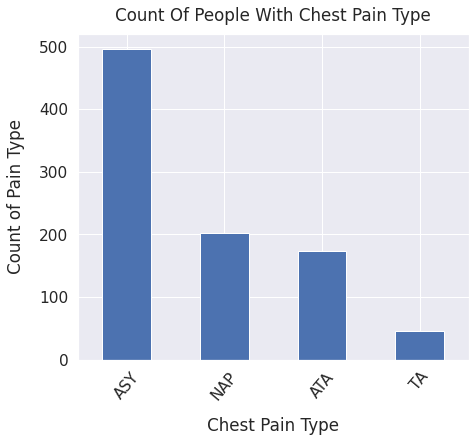

In [100]:
# create bar plot for ChestPainType column
sns.set(font_scale = 1.4)
ml_df['ChestPainType'].value_counts().plot(kind = 'bar', figsize = (7, 6), rot = 50)
plt.xlabel("Chest Pain Type", labelpad = 14)
plt.ylabel("Count of Pain Type", labelpad = 14)
plt.title("Count Of People With Chest Pain Type", y = 1.02);

* Most persons are Asymptomatic according to this bar plot.

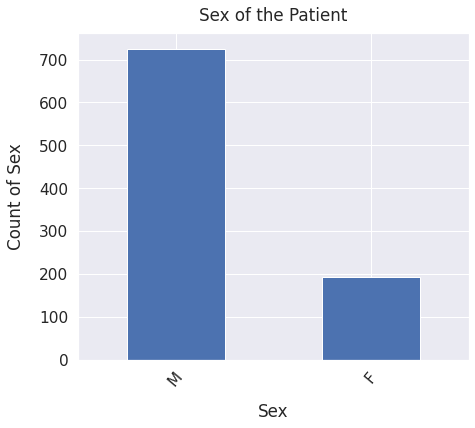

In [99]:
# create a bar plot for the Sex column
sns.set(font_scale = 1.4)
ml_df['Sex'].value_counts().plot(kind = 'bar', figsize = (7, 6), rot = 50)
plt.xlabel("Sex", labelpad = 14)
plt.ylabel("Count of Sex", labelpad = 14)
plt.title("Sex of the Patient", y = 1.02);

* There are more males than females in this dataset.

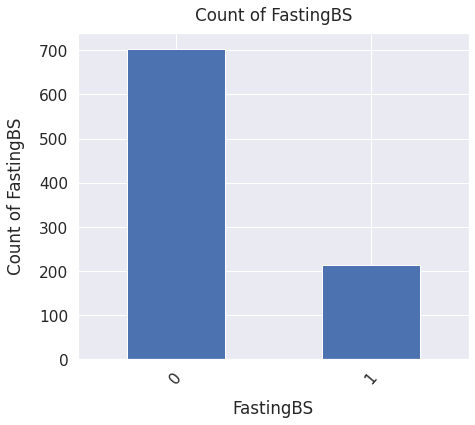

In [88]:
# create a barplot for RestingBP
sns.set(font_scale = 1.4)
ml_df['FastingBS'].value_counts().plot(kind = 'bar', figsize = (7, 6), rot = 50)
plt.xlabel("FastingBS", labelpad = 14)
plt.ylabel("Count of FastingBS", labelpad = 14)
plt.title("Count of FastingBS", y = 1.02);

* There is a lower count of patients who have fasting blood sugar.

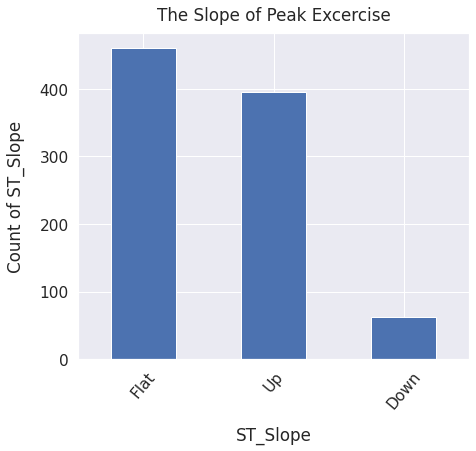

In [92]:
# create a barplot for ST_Slope column
sns.set(font_scale = 1.4)
ml_df['ST_Slope'].value_counts().plot(kind = 'bar', figsize = (7, 6), rot = 50)
plt.xlabel("ST_Slope", labelpad = 14)
plt.ylabel("Count of ST_Slope", labelpad = 14)
plt.title("The Slope of Peak Excercise", y = 1.02);


* There is a low amount of persons with down sloping peak exercise.

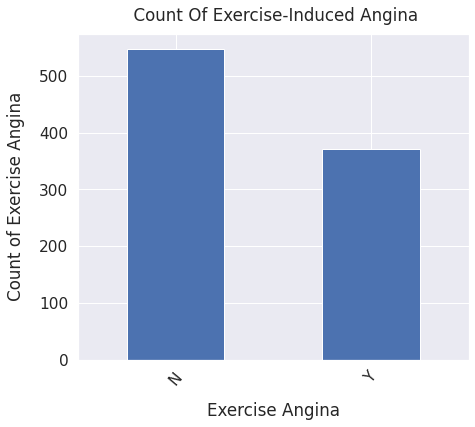

In [102]:
# create a barplot for Exercise Angina
sns.set(font_scale = 1.4)
ml_df['ExerciseAngina'].value_counts().plot(kind = 'bar', figsize = (7, 6), rot = 50)
plt.xlabel("Exercise Angina", labelpad = 14)
plt.ylabel("Count of Exercise Angina", labelpad = 14)
plt.title(" Count Of Exercise-Induced Angina", y = 1.02);


* There are more persons with no Exercise Angina.

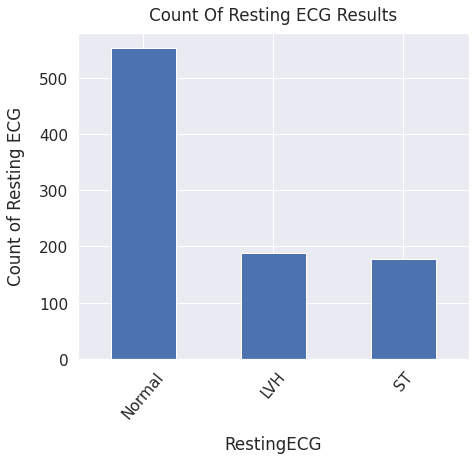

In [101]:
# create a barplot for Resting ECG column
sns.set(font_scale = 1.4)
ml_df['RestingECG'].value_counts().plot(kind = 'bar', figsize = (7, 6), rot = 50)
plt.xlabel("RestingECG", labelpad = 14)
plt.ylabel("Count of Resting ECG", labelpad = 14)
plt.title("Count Of Resting ECG Results", y = 1.02);

* Most persons have a normal Resting ECG.

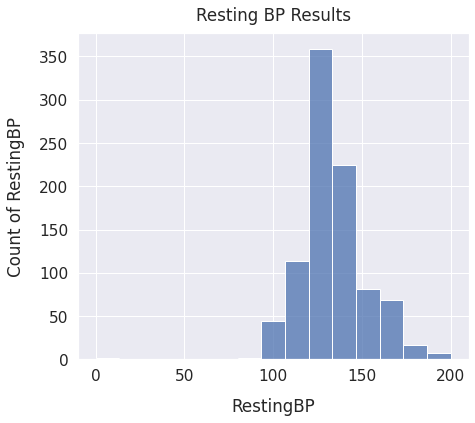

In [108]:
# create a histogram for the RestingBP column
fig, ax = plt.subplots(figsize = (7, 6), facecolor = 'w');
sns.histplot(data = ml_df, x = 'RestingBP', bins = 15);
plt.xlabel("RestingBP", labelpad = 14)
plt.ylabel("Count of RestingBP", labelpad = 14)
plt.title("Resting BP Results", y = 1.02);

* The highest count of persons with Resting BP is at 120.

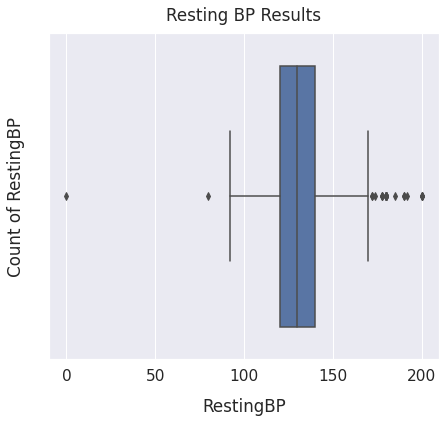

In [110]:
# create a box plot to identify possible outliers
fig, ax = plt.subplots(figsize = (7, 6), facecolor = 'w');
sns.boxplot(data = ml_df, x = 'RestingBP');
plt.xlabel("RestingBP", labelpad = 14)
plt.ylabel("Count of RestingBP", labelpad = 14)
plt.title("Resting BP Results", y = 1.02);

* There are outliers on the lower end and higher end for the RestingBP.

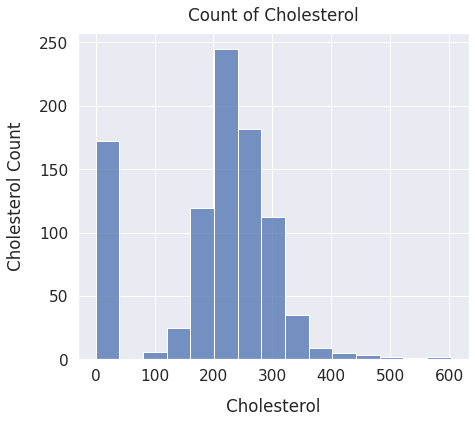

In [111]:
# create a histogram for the Cholesterol column
fig, ax = plt.subplots(figsize = (7, 6), facecolor = 'w');
sns.histplot(data = ml_df, x = 'Cholesterol', bins = 15);
plt.xlabel("Cholesterol", labelpad = 14)
plt.ylabel("Cholesterol Count", labelpad = 14)
plt.title("Count of Cholesterol", y = 1.02);

* There are persons with the highest cholesterol level between 200 and 250.

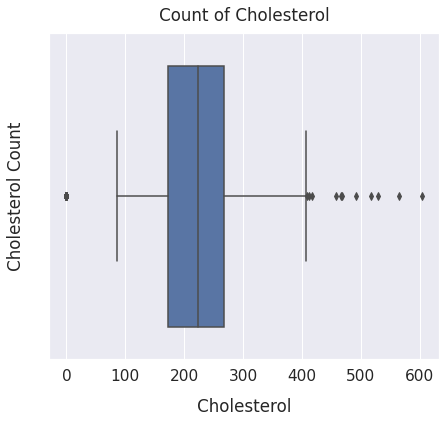

In [112]:
# create a box plot to identify possible outliers
fig, ax = plt.subplots(figsize = (7, 6), facecolor = 'w');
sns.boxplot(data = ml_df, x = 'Cholesterol');
plt.xlabel("Cholesterol", labelpad = 14)
plt.ylabel("Cholesterol Count", labelpad = 14)
plt.title("Count of Cholesterol", y = 1.02);

* There is an outlier for persons with lower than 'normal' cholesterol and outliers for persons with higher than 'normal' cholesterol.

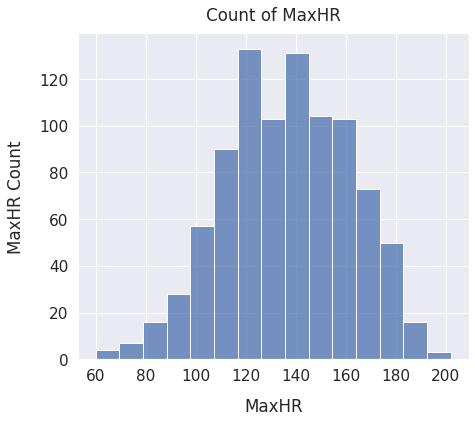

In [114]:
# create a histogram for the MaxHR column
fig, ax = plt.subplots(figsize = (7, 6), facecolor = 'w');
sns.histplot(data = ml_df, x = 'MaxHR', bins = 15);
plt.xlabel("MaxHR", labelpad = 14)
plt.ylabel("MaxHR Count", labelpad = 14)
plt.title("Count of MaxHR", y = 1.02);

* MaxHR is highest at 120 and 140.

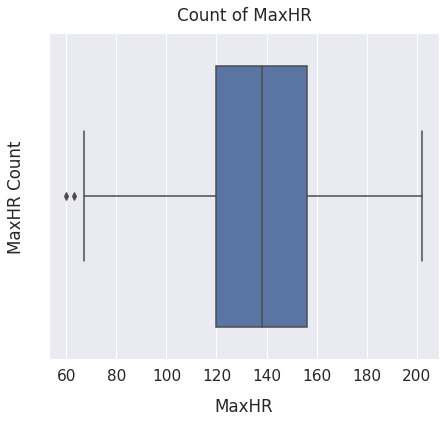

In [116]:
# create a box plot to identify possible outliers
fig, ax = plt.subplots(figsize = (7, 6), facecolor = 'w');
sns.boxplot(data = ml_df, x = 'MaxHR');
plt.xlabel("MaxHR", labelpad = 14)
plt.ylabel("MaxHR Count", labelpad = 14)
plt.title("Count of MaxHR", y = 1.02);

* There is an outlier for lower than 'normal' MaxHR.

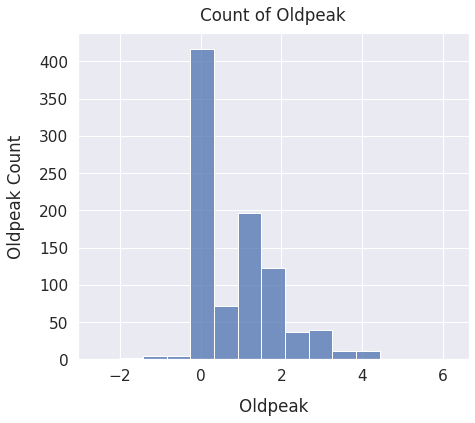

In [117]:
# create a histogram for the Oldpeak column
fig, ax = plt.subplots(figsize = (7, 6), facecolor = 'w');
sns.histplot(data = ml_df, x = 'Oldpeak', bins = 15);
plt.xlabel("Oldpeak", labelpad = 14)
plt.ylabel("Oldpeak Count", labelpad = 14)
plt.title("Count of Oldpeak", y = 1.02);

* There are a large number of persons with an Oldpeak at 0.              

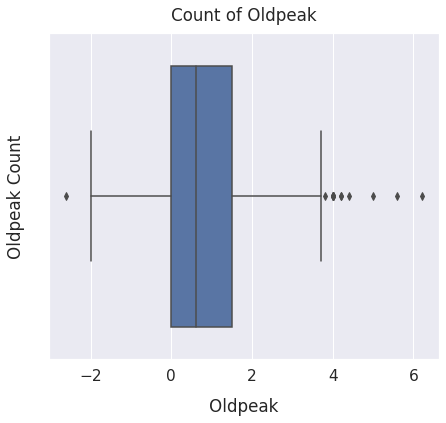

In [118]:
# create a box plot to identify possible outliers
fig, ax = plt.subplots(figsize = (7, 6), facecolor = 'w');
sns.boxplot(data = ml_df, x = 'Oldpeak');
plt.xlabel("Oldpeak", labelpad = 14)
plt.ylabel("Oldpeak Count", labelpad = 14)
plt.title("Count of Oldpeak", y = 1.02);

* There are outliers for Oldpeak outside the range on the lower and higher side.

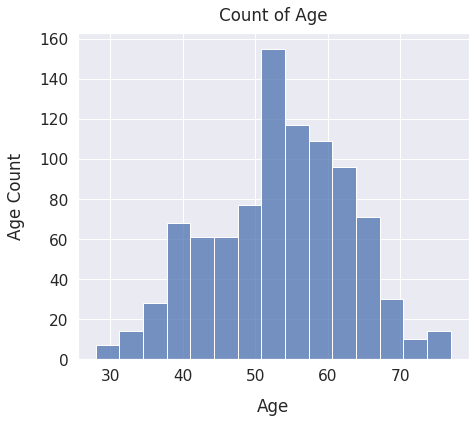

In [119]:
# create a histogram for the Age column
fig, ax = plt.subplots(figsize = (7, 6), facecolor = 'w');
sns.histplot(data = ml_df, x = 'Age', bins = 15);
plt.xlabel("Age", labelpad = 14)
plt.ylabel("Age Count", labelpad = 14)
plt.title("Count of Age", y = 1.02);

* Most patients are between the ages of 50-55.

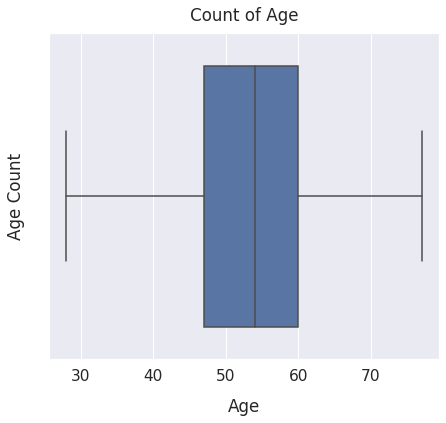

In [120]:
# create a box plot to identify possible outliers
fig, ax = plt.subplots(figsize = (7, 6), facecolor = 'w');
sns.boxplot(data = ml_df, x = 'Age');
plt.xlabel("Age", labelpad = 14)
plt.ylabel("Age Count", labelpad = 14)
plt.title("Count of Age", y = 1.02);

* There are no outliers in the age column.

# 10/14/22
# Part 3

# Assignment:
* For this part of the project, you will continue your EDA by
  * Identifying any moderate or strong correlations between your target and your features and/or between one feature and another.
  * Creating multivariate exploratory visuals to further understand your data.
* From your data analysis, create two visuals that demonstrate key findings of interest to a stakeholder. These visuals should be reporting quality. Be sure to explain the finding associated with each visual. (NO histograms, boxplots, or correlation plots)

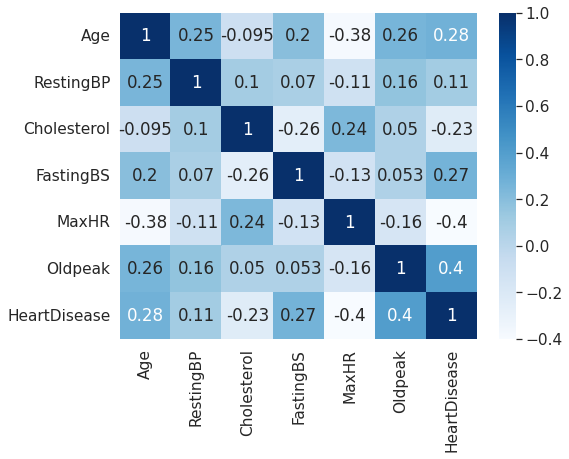

In [121]:
# create a heatmap to find correlations between the target and features
corr = ml_df.corr()
ml_df.style.use('seaborn')
plt.figure(figsize = (8, 6))
sns.heatmap(corr, cmap = 'Blues', annot = True);

* There are strong correlations between Age and HeartDisease, FastingsBS and Heart Disease, and also RestingBP and Age in the above heatmap.

# Create 2 multivariate explanatory visualizations to demonstrate key findings

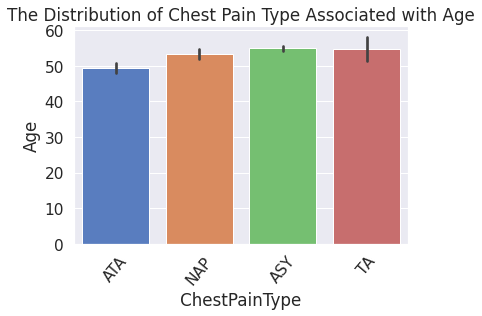

In [141]:
# create a bar plot to visualize findings between Chest Pain Type and Age
ml_df.style.use('seaborn')
ax = sns.barplot(data = ml_df, x = 'ChestPainType', y = 'Age', palette = 'muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);
ax.set_title('The Distribution of Chest Pain Type Associated with Age');

* Person who are of age 55 have the same ASY and TA Chest Pain Type.

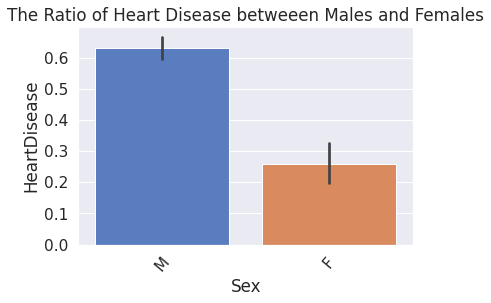

In [127]:
# creat a bar plot to visualize findings between Sex and HeartDisease
ml_df.style.use('seaborn')
ax = sns.barplot(data = ml_df, x = 'Sex', y = 'HeartDisease', palette = 'muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);
ax.set_title('The Ratio of Heart Disease betweeen Males and Females');

* There are more males than females with heart disease.

# Findings
* In the plots above, there are more men than women who have heart disease. There can be many factors that may correlate with this.

* Also older persons tend to experience TA and ASY Chest Pain type. 